In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


Importante: O exemplo GIANTSTEPS3519546.LOFI não pode ser utilizado. Tempo mais curto que a janela.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#import shutil
#shutil.copy2("/content/drive/MyDrive/utilities.py", "/content/utilities.py")
#shutil.copy2("/content/drive/MyDrive/ConvNet3DSpecShanMorl.py", "/content/ConvNet3DSpecShanMorl.py")
#shutil.copy2("/content/drive/MyDrive/config.py", "/content/config.py")

'/content/config.py'

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.utils import to_categorical
from tensorflow.data import AUTOTUNE
import matplotlib.pyplot as plt
import tensorflow as tf
import argparse
import os
import numpy as np
import pandas as pd
import math
from tensorflow import keras
from sklearn.preprocessing import MultiLabelBinarizer
from IPython.display import Audio, clear_output, display
from glob import glob
import random

from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models


In [ ]:
BS = 32 #batch size

base_model = MobileNetV2(input_shape=(300, 300, 3), include_top=False, weights='imagenet')

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.Dropout(0.3)(x)
output = layers.Dense(10, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

<ipython-input-3-2ab2edfa481a>:3: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(input_shape=(300, 300, 3), include_top=False, weights='imagenet')


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 300, 300,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 150, 150,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 150, 150,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 150, 150,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 150, 150,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 150, 150,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 150, 150,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 150, 150,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 150, 150,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 150, 150,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 150, 150,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 150, 150,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 151, 151,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 75, 75,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 75, 75,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 75, 75,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 75, 75,    │      2,304 │ block_1_depthwis

 Total params: 2,753,760 (10.50 MB)

 Trainable params: 1,691,658 (6.45 MB)

 Non-trainable params: 731,584 (2.79 MB)

 Optimizer params: 330,518 (1.26 MB)

# k=1

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento1.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [ ]:
TRAIN_DATASET = os.path.join("/content", "training1")
VAL_DATASET = os.path.join("/content", "validation1")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = tf.image.per_image_standardization(image)

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [ ]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
list_images_train = list(images_train.as_numpy_iterator())

In [ ]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [ ]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [ ]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [ ]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)


base_model.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model.fit

In [ ]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 335ms/step - accuracy: 0.1888 - loss: 2.3280 - val_accuracy: 0.5200 - val_loss: 1.5300
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4895 - loss: 1.5057 - val_accuracy: 0.5450 - val_loss: 1.2642
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5480 - loss: 1.3459 - val_accuracy: 0.6500 - val_loss: 1.0875
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5767 - loss: 1.2404 - val_accuracy: 0.6750 - val_loss: 1.0043
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6446 - loss: 1.1077 - val_accuracy: 0.6700 - val_loss: 0.9487
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6598 - loss: 0.9992 - val_accuracy: 0.6700 - val_loss: 0.9039
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6700 - loss: 0.9917 - val_accuracy: 0.7000 - val_loss: 0.8660
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.7072 - loss: 0.8934 - val_accuracy: 

In [ ]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.optimizer.learning_rate.assign(5e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9934 - loss: 0.0456 - val_accuracy: 0.7850 - val_loss: 0.7705
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9865 - loss: 0.0508 - val_accuracy: 0.7850 - val_loss: 0.7757
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9960 - loss: 0.0438 - val_accuracy: 0.7850 - val_loss: 0.7754
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9836 - loss: 0.0530 - val_accuracy: 0.7950 - val_loss: 0.7780
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9904 - loss: 0.0508 - val_accuracy: 0.7850 - val_loss: 0.7798
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 1.0000 - loss: 0.0331 - val_accuracy: 0.7800 - val_loss: 0.7815
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9877 - loss: 0.0469 - val_accuracy: 0.7800 - val_loss: 0.7802
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9982 - loss: 0.0426 - val_accuracy: 0.7800 - v

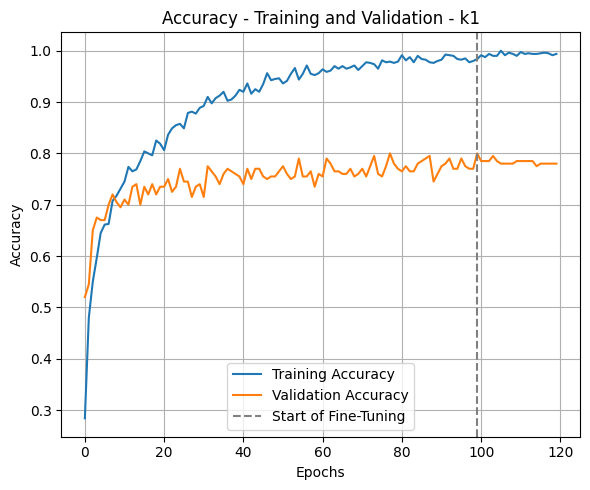

In [ ]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k1')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/accuracy_genre_mel_k1.pdf')
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/acc_total_k1.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/val_acc_total_k1.npy', val_acc_total)

In [ ]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/model_k1.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/model_k1.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


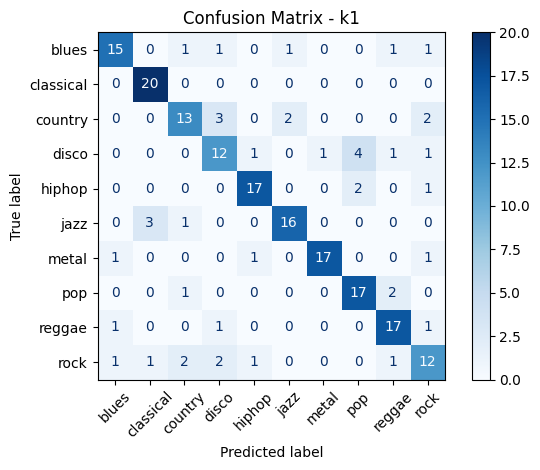

In [ ]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k1")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/confusionmatrix_genre_mel_k1.pdf')
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()

# k=2

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento2.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [ ]:
TRAIN_DATASET = os.path.join("/content", "training2")
VAL_DATASET = os.path.join("/content", "validation2")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = tf.image.per_image_standardization(image)

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [ ]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
list_images_train = list(images_train.as_numpy_iterator())

In [ ]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [ ]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [ ]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [ ]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)


base_model.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model.fit

In [ ]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 330ms/step - accuracy: 0.2072 - loss: 2.2787 - val_accuracy: 0.5700 - val_loss: 1.4498
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4752 - loss: 1.5280 - val_accuracy: 0.6300 - val_loss: 1.1855
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5747 - loss: 1.2306 - val_accuracy: 0.6550 - val_loss: 1.0611
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6025 - loss: 1.1572 - val_accuracy: 0.6900 - val_loss: 1.0399
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6409 - loss: 1.1081 - val_accuracy: 0.7050 - val_loss: 0.9434
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6440 - loss: 1.0126 - val_accuracy: 0.7150 - val_loss: 0.8999
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6489 - loss: 0.9688 - val_accuracy: 0.7100 - val_loss: 0.9006
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6745 - loss: 0.9227 - val_accuracy: 

In [ ]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.optimizer.learning_rate.assign(5e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 78ms/step - accuracy: 0.9917 - loss: 0.0585 - val_accuracy: 0.7900 - val_loss: 0.7622
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - accuracy: 0.9964 - loss: 0.0488 - val_accuracy: 0.7900 - val_loss: 0.7519
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9962 - loss: 0.0413 - val_accuracy: 0.7950 - val_loss: 0.7482
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9935 - loss: 0.0495 - val_accuracy: 0.7950 - val_loss: 0.7517
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9935 - loss: 0.0561 - val_accuracy: 0.8050 - val_loss: 0.7464
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9958 - loss: 0.0469 - val_accuracy: 0.8000 - val_loss: 0.7487
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9967 - loss: 0.0390 - val_accuracy: 0.8000 - val_loss: 0.7545
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9981 - loss: 0.0420 - val_accuracy: 0.8050 - v

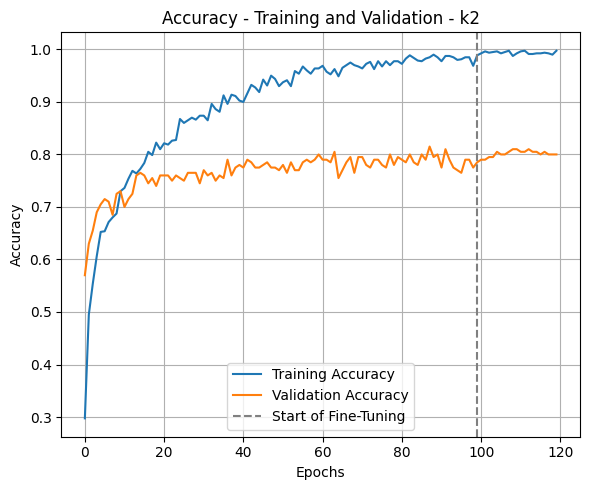

In [ ]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k2')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/accuracy_genre_mel_k2.pdf')
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/acc_total_k2.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/val_acc_total_k2.npy', val_acc_total)

In [ ]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/model_k2.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/model_k2.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


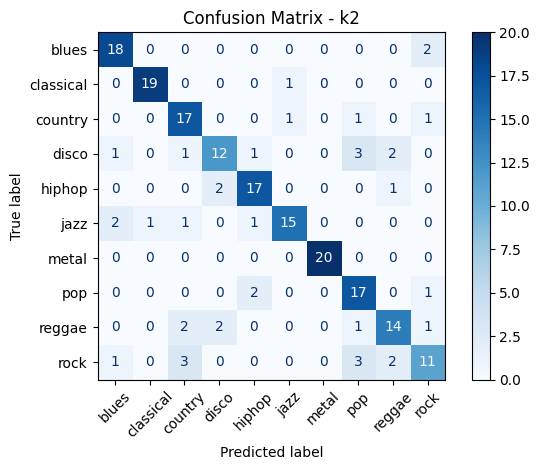

In [ ]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k2")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/confusionmatrix_genre_mel_k2.pdf')
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()

# k=3

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento3.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [ ]:
TRAIN_DATASET = os.path.join("/content", "training3")
VAL_DATASET = os.path.join("/content", "validation3")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = tf.image.per_image_standardization(image)

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [ ]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
list_images_train = list(images_train.as_numpy_iterator())

In [ ]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [ ]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [ ]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [ ]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)


base_model.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model.fit

In [ ]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 322ms/step - accuracy: 0.1804 - loss: 2.3713 - val_accuracy: 0.4300 - val_loss: 1.6562
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4548 - loss: 1.5371 - val_accuracy: 0.5100 - val_loss: 1.4282
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.5549 - loss: 1.2884 - val_accuracy: 0.5550 - val_loss: 1.3319
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.5887 - loss: 1.1952 - val_accuracy: 0.5550 - val_loss: 1.2773
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6198 - loss: 1.1059 - val_accuracy: 0.5900 - val_loss: 1.1845
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6828 - loss: 0.9361 - val_accuracy: 0.5800 - val_loss: 1.1476
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6895 - loss: 0.9214 - val_accuracy: 0.6600 - val_loss: 1.0844
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7267 - loss: 0.8180 - val_accuracy: 

In [ ]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.optimizer.learning_rate.assign(5e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 70ms/step - accuracy: 0.9945 - loss: 0.0488 - val_accuracy: 0.6700 - val_loss: 1.3172
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9958 - loss: 0.0406 - val_accuracy: 0.6550 - val_loss: 1.3101
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9937 - loss: 0.0419 - val_accuracy: 0.6550 - val_loss: 1.3058
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9958 - loss: 0.0430 - val_accuracy: 0.6450 - val_loss: 1.3074
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9997 - loss: 0.0328 - val_accuracy: 0.6450 - val_loss: 1.3106
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9990 - loss: 0.0323 - val_accuracy: 0.6450 - val_loss: 1.3055
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9954 - loss: 0.0322 - val_accuracy: 0.6450 - val_loss: 1.3067
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9992 - loss: 0.0335 - val_accuracy: 0.6600 - v

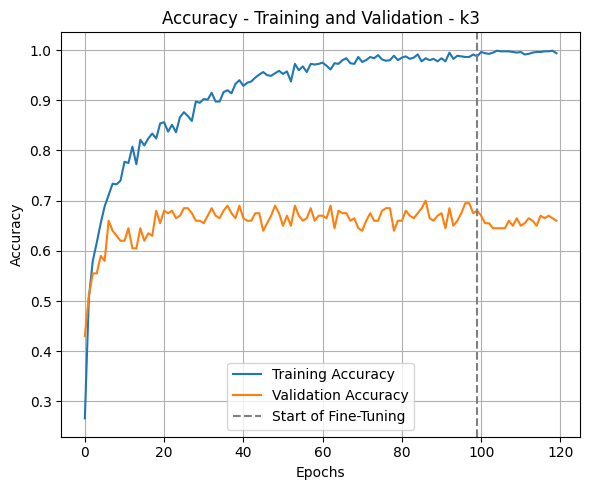

In [ ]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k3')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/accuracy_genre_mel_k3.pdf')
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/acc_total_k3.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/val_acc_total_k3.npy', val_acc_total)

In [ ]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/model_k3.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/model_k3.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


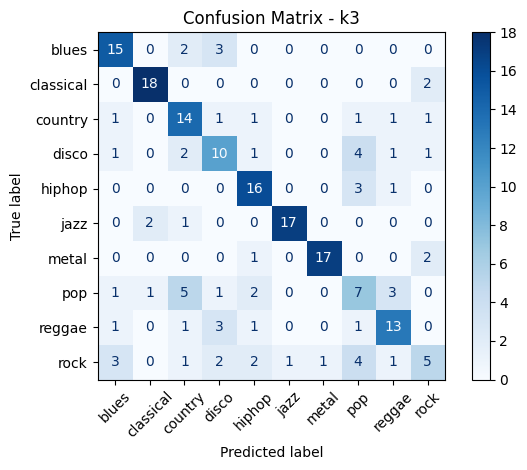

In [ ]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k3")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/confusionmatrix_genre_mel_k3.pdf')
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()

# k=4

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento4.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [ ]:
TRAIN_DATASET = os.path.join("/content", "training4")
VAL_DATASET = os.path.join("/content", "validation4")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = tf.image.per_image_standardization(image)

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [ ]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
list_images_train = list(images_train.as_numpy_iterator())

In [ ]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [ ]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [ ]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [ ]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)


base_model.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model.fit

In [ ]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 321ms/step - accuracy: 0.2396 - loss: 2.2284 - val_accuracy: 0.5100 - val_loss: 1.5662
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.4820 - loss: 1.5139 - val_accuracy: 0.6100 - val_loss: 1.2870
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.5761 - loss: 1.2887 - val_accuracy: 0.6400 - val_loss: 1.1608
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5875 - loss: 1.2038 - val_accuracy: 0.6800 - val_loss: 1.0940
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - accuracy: 0.6579 - loss: 1.0142 - val_accuracy: 0.6700 - val_loss: 1.0287
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6971 - loss: 0.8847 - val_accuracy: 0.6650 - val_loss: 0.9908
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6926 - loss: 0.9149 - val_accuracy: 0.6850 - val_loss: 0.9567
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7186 - loss: 0.8415 - val_accuracy: 

In [ ]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.optimizer.learning_rate.assign(5e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9861 - loss: 0.0480 - val_accuracy: 0.7800 - val_loss: 0.9479
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9947 - loss: 0.0416 - val_accuracy: 0.7800 - val_loss: 0.9450
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9966 - loss: 0.0355 - val_accuracy: 0.7900 - val_loss: 0.9499
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9913 - loss: 0.0494 - val_accuracy: 0.7750 - val_loss: 0.9470
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9997 - loss: 0.0288 - val_accuracy: 0.7950 - val_loss: 0.9472
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9990 - loss: 0.0289 - val_accuracy: 0.7950 - val_loss: 0.9533
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9991 - loss: 0.0344 - val_accuracy: 0.7900 - val_loss: 0.9553
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9935 - loss: 0.0470 - val_accuracy: 0.7750 - v

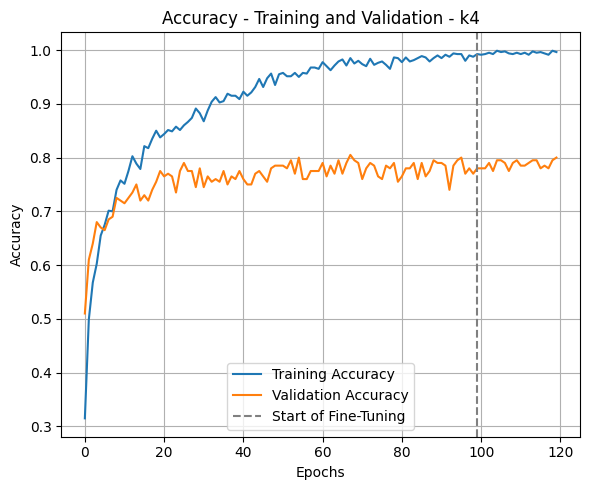

In [ ]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k4')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/accuracy_genre_mel_k4.pdf')
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/acc_total_k4.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/val_acc_total_k4.npy', val_acc_total)

In [ ]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/model_k4.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/model_k4.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


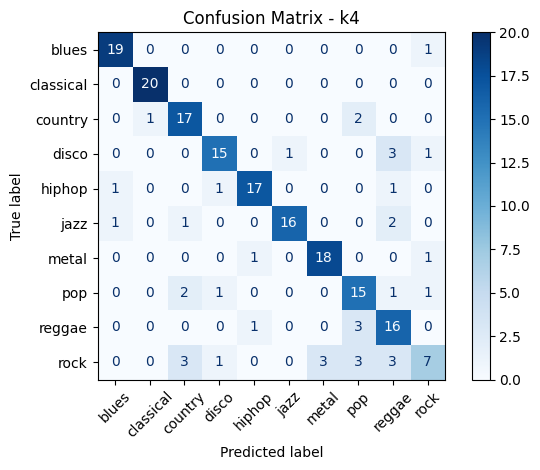

In [ ]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k4")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/confusionmatrix_genre_mel_k4.pdf')
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()

# k=5

In [ ]:
import zipfile

zip_ref = zipfile.ZipFile("/content/drive/MyDrive/Musical Genre Classification/Database/genre_spec_mel_kfold/treinamento5.zip", 'r')
zip_ref.extractall("/content")
zip_ref.close()

### Tensors Definitions

In [ ]:
TRAIN_DATASET = os.path.join("/content", "training5")
VAL_DATASET = os.path.join("/content", "validation5")
#TEST_DATASET = os.path.join("/content", "teste1")
#METRONOMOS_DATASET = os.path.join("/content/drive/MyDrive/Database", "metronomos_review")

classes = os.listdir(VAL_DATASET) #10 classes
classes = sorted(classes)


def make_dataset(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
def make_dataset_predict(path, batch_size):
    def parse_image(filename):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, (300, 300))  # resize para modelos pré-treinados
        image = tf.image.per_image_standardization(image)
        return image

    def configure_for_performance(ds):
        #ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        #ds = ds.repeat()
        ds = ds.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
        return ds

    class_names = sorted(os.listdir(path))  # Agora local
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    images_ds = filenames_ds.map(parse_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)
    ds = tf.data.Dataset.zip((images_ds, labels_ds))
    ds = configure_for_performance(ds)

    return ds, class_names, images_ds, labels_ds

In [ ]:
trainDS, classes_t, images_train, labels_train = make_dataset(TRAIN_DATASET, BS) #labels com valores 0 a 234
validationDS, classes_v, images_validation, labels_validation = make_dataset_predict(VAL_DATASET, BS) #labels com valores 0 a 234
#testDS, classes_te, images_test, labels_test = make_dataset(TEST_DATASET, BS)
print(trainDS)
print(validationDS)
#print(testDS)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
def make_dataset_augmentation(path, batch_size):
    def parse_image_with_stretch_tf(filename, label):
        image = tf.io.read_file(filename)
        image = tf.image.decode_jpeg(image, channels=3)

        # Stretch horizontal
        stretch_factors = tf.constant([1, 1.1, 1.2, 1.3], dtype=tf.float32)
        idx = tf.random.uniform([], minval=0, maxval=3, dtype=tf.int32)
        stretch = stretch_factors[idx]

        height = tf.shape(image)[0]
        width = tf.cast(tf.shape(image)[1], tf.float32)
        new_width = tf.cast(width * stretch, tf.int32)

        image = tf.image.resize(image, size=[height, new_width])
        image = tf.image.resize_with_crop_or_pad(image, 300, 300)
        image = tf.image.per_image_standardization(image)

        # Define forma estática para o grafo entender
        image.set_shape([300, 300, 3])
        return image, label

    def configure_for_performance(ds):
        ds = ds.shuffle(buffer_size=1000)
        ds = ds.batch(batch_size)
        ds = ds.repeat()
        ds = ds.prefetch(tf.data.AUTOTUNE)
        return ds

    # Carrega nomes e rótulos
    class_names = sorted(os.listdir(path))
    filenames = glob(path + '/*/*')
    random.shuffle(filenames)
    labels = [class_names.index(name.split('/')[-2]) for name in filenames]

    filenames_ds = tf.data.Dataset.from_tensor_slices(filenames)
    labels_ds = tf.data.Dataset.from_tensor_slices(labels)

    # Unifica imagens e rótulos ANTES do map
    ds = tf.data.Dataset.zip((filenames_ds, labels_ds))
    ds = ds.map(parse_image_with_stretch_tf, num_parallel_calls=tf.data.AUTOTUNE)
    ds = configure_for_performance(ds)

    return ds, class_names

In [ ]:
trainDS_aug, classes_t_aug = make_dataset_augmentation(TRAIN_DATASET, BS) #labels com valores 0 a 234
print(trainDS_aug)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(classes_t)
print(classes_t_aug)
print(classes)

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
list_images_train = list(images_train.as_numpy_iterator())

In [ ]:
list_images_validation = list(images_validation.as_numpy_iterator())

In [ ]:
#list_images_train_aug = list(images_train_aug.as_numpy_iterator())

In [ ]:
#list_images_test = list(images_test.as_numpy_iterator())

In [ ]:
list_labels_train = list(labels_train.as_numpy_iterator())
labels_train_true = []
for i in list_labels_train:
       labels_train_true.append(classes[i])
#labels_train_true = np.array(labels_train_true, int) #labels de 23 a 257

list_labels_validation = list(labels_validation.as_numpy_iterator())
labels_validation_true = []
for i in list_labels_validation:
       labels_validation_true.append(classes[i])
#labels_validation_true = np.array(labels_validation_true, int)  #labels de 23 a 257

#list_labels_test= list(labels_test.as_numpy_iterator())
#labels_test_true = []
#for i in list_labels_test:
#       labels_test_true.append(classes[i])
#labels_test_true = np.array(labels_test_true, int)  #labels de 23 a 257

In [ ]:
images_train_ds = np.array(list_images_train)
print(images_train_ds.shape)
images_validation_ds = np.array(list_images_validation)
print(images_validation_ds.shape)
#images_test_ds = np.array(list_images_test)
print(len(labels_train_true))
print(len(labels_validation_true))
#print(labels_test_true.shape)
print(trainDS_aug)
print(trainDS)
print(validationDS)
#print(testDS)

(800, 300, 300, 3)
(200, 300, 300, 3)
800
200
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 300, 300, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
print(images_train_ds[1].shape)

(300, 300, 3)


In [ ]:
#print(list_images_train_aug[1].shape)

In [ ]:
num_images_predict = len(glob(TRAIN_DATASET + '/*/*'))
num_images_val = len(glob(VAL_DATASET + '/*/*'))
steps_per_epoch_predict =math.ceil(num_images_predict/BS)
validation_steps = math.ceil(num_images_val/BS)

#Criando o multilabel binarizer:

mlb = MultiLabelBinarizer()
dicionario = mlb.fit_transform([classes])

In [ ]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=10000,
    decay_rate=0.9)
opt = keras.optimizers.Adam(learning_rate=lr_schedule)


base_model.trainable = False

model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Model.fit

In [ ]:
%%time
history = model.fit(trainDS_aug, validation_data=validationDS, epochs=100, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 20s 324ms/step - accuracy: 0.2033 - loss: 2.3897 - val_accuracy: 0.4800 - val_loss: 1.6222
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.4768 - loss: 1.5525 - val_accuracy: 0.5300 - val_loss: 1.3766
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.5845 - loss: 1.3235 - val_accuracy: 0.5450 - val_loss: 1.2869
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6405 - loss: 1.1087 - val_accuracy: 0.6100 - val_loss: 1.1752
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.6431 - loss: 1.0600 - val_accuracy: 0.6050 - val_loss: 1.1006
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6757 - loss: 0.9804 - val_accuracy: 0.6000 - val_loss: 1.0992
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.7000 - loss: 0.9001 - val_accuracy: 0.6650 - val_loss: 1.0190
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - accuracy: 0.6927 - loss: 0.8542 - val_accuracy: 

In [ ]:



# Fase 2: Fine-tuning (descongelar parte da base)
base_model.trainable = True

# Congela camadas iniciais e libera só as últimas 20, por exemplo:
for layer in base_model.layers[:-50]:
    layer.trainable = False

model.optimizer.learning_rate.assign(5e-5)

#keras.backend.set_value(model.optimizer.learning_rate, 1e-5)

#from tensorflow.keras.optimizers import Adam

#model.compile(optimizer=Adam(1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compila com taxa de aprendizado reduzida
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(trainDS_aug, validation_data=validationDS, epochs=20, batch_size=BS, steps_per_epoch=steps_per_epoch_predict,  validation_steps=validation_steps ,verbose=1)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9912 - loss: 0.0557 - val_accuracy: 0.6850 - val_loss: 1.1924
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9955 - loss: 0.0379 - val_accuracy: 0.6950 - val_loss: 1.1780
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9886 - loss: 0.0404 - val_accuracy: 0.7100 - val_loss: 1.1716
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9939 - loss: 0.0435 - val_accuracy: 0.7150 - val_loss: 1.1750
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9987 - loss: 0.0289 - val_accuracy: 0.7050 - val_loss: 1.1794
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.9918 - loss: 0.0416 - val_accuracy: 0.7000 - val_loss: 1.1799
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 69ms/step - accuracy: 0.9985 - loss: 0.0340 - val_accuracy: 0.7000 - val_loss: 1.1809
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.9983 - loss: 0.0327 - val_accuracy: 0.7050 - v

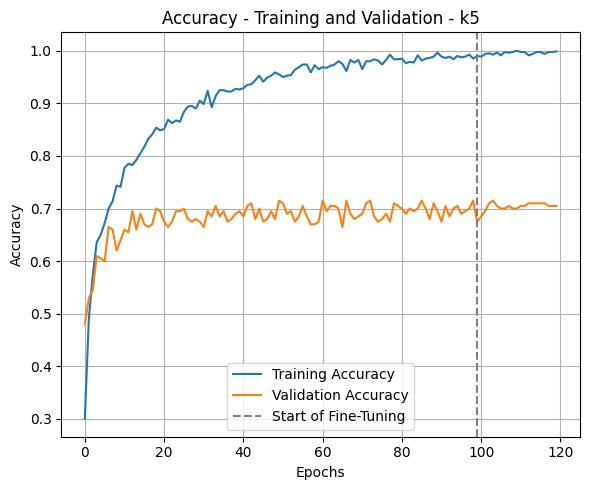

In [ ]:
acc_phase1 = history.history['accuracy']
val_acc_phase1 = history.history['val_accuracy']

acc_phase2 = history_finetune.history['accuracy']
val_acc_phase2 = history_finetune.history['val_accuracy']

acc_total = acc_phase1 + acc_phase2
val_acc_total = val_acc_phase1 + val_acc_phase2
epochs_total = range(len(acc_total))

plt.figure(figsize=(6,5))
plt.plot(epochs_total, acc_total, label='Training Accuracy')
plt.plot(epochs_total, val_acc_total, label='Validation Accuracy')

# Mark the transition between phases
plt.axvline(x=len(acc_phase1)-1, color='gray', linestyle='--', label='Start of Fine-Tuning')

plt.title('Accuracy - Training and Validation - k5')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/accuracy_genre_mel_k5.pdf')
plt.show()

In [ ]:
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/acc_total_k5.npy', acc_total)
np.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/val_acc_total_k5.npy', val_acc_total)

In [ ]:
model.save('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/model_k5.keras')

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/model_k5.keras')

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 112 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

testDS_eval = validationDS.unbatch().batch(32)  # ou validationDS

y_true = []
y_pred = []

for images, labels in testDS_eval:
    preds = model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

cm = confusion_matrix(y_true, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


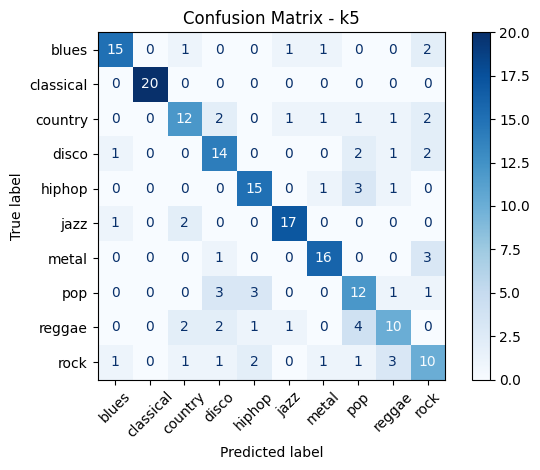

In [ ]:
# Supondo que você tem class_names do seu dataset
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues', xticks_rotation=45)
plt.title("Confusion Matrix - k5")
plt.tight_layout()
plt.savefig('/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold/confusionmatrix_genre_mel_k5.pdf')
plt.show()

In [ ]:
from google.colab import runtime
runtime.unassign()

# Geração de Tabela

In [2]:
import numpy as np
import pandas as pd
import os

# Diretório base onde os arquivos estão salvos
base_path = "/content/drive/MyDrive/Musical Genre Classification/Resultados/mobilenetv2_genre_spec_mel_kfold"

# Inicializa dicionários para os resultados
final_train_acc = {}
max_train_acc = {}
final_val_acc = {}
max_val_acc = {}

# Loop para k = 1 até 5
for k in range(1, 6):
    acc_path = os.path.join(base_path, f"acc_total_k{k}.npy")
    val_acc_path = os.path.join(base_path, f"val_acc_total_k{k}.npy")

    acc = np.load(acc_path)
    val_acc = np.load(val_acc_path)

    final_train_acc[f'k{k}'] = acc[-1]
    max_train_acc[f'k{k}'] = np.max(acc)
    final_val_acc[f'k{k}'] = val_acc[-1]
    max_val_acc[f'k{k}'] = np.max(val_acc)

# Calcula a média e desvio padrão para cada linha
def add_resultado_final_std(row):
    valores = np.array([v for v in row.values()])
    return np.mean(valores), np.std(valores)

# Construindo DataFrame
df = pd.DataFrame({
    "Acurácia Final - Treinamento": final_train_acc,
    "Valor Máximo Acurácia - Treinamento": max_train_acc,
    "Acurácia Final - Validação": final_val_acc,
    "Valor Máximo Acurácia - Validação": max_val_acc
}).T

# Adiciona colunas de média e desvio padrão
df["Resultado Final"] = df.mean(axis=1)
df["Desvio Padrão"] = df.std(axis=1)

In [3]:
df

,k1,k2,k3,k4,k5,Resultado Final,Desvio Padrão
Acurácia Final - Treinamento,0.99375,0.9975,0.99375,0.99625,0.99875,0.996,0.002000
Valor Máximo Acurácia - Treinamento,1.00000,0.9975,0.99875,0.99875,1.00000,0.999,0.000935
Acurácia Final - Validação,0.78000,0.8000,0.66000,0.80000,0.70500,0.749,0.056604
Valor Máximo Acurácia - Validação,0.80000,0.8150,0.70000,0.80500,0.71500,0.767,0.049051
